## Step 1: Imports

### Import relevant libraries and modules

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import chi2_contingency

from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, make_scorer,\
recall_score, precision_score, f1_score, accuracy_score

### Import data

In [312]:
df = pd.read_csv('Training Data.csv')
print('df_shape: ', df.shape)
df.head()

df_shape:  (252000, 13)


,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [306]:
# Inspect categorical data
cat_variable = df.select_dtypes('object').columns

for col in cat_variable:
    print(df[col].value_counts())
    print(f'{col} has {df[col].nunique()} unique values')
    print('\n')

Married/Single
single     226272
married     25728
Name: count, dtype: int64
Married/Single has 2 unique values


House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64
House_Ownership has 3 unique values


Car_Ownership
no     176000
yes     76000
Name: count, dtype: int64
Car_Ownership has 2 unique values


Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant           

### Data Cleaning

In [300]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [313]:
df.columns = df.columns.str.lower()
df.rename(columns= {'married/single': 'married_single'}, inplace=True)
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [314]:
df['city'] = df['city'].str.extract('([A-Za-z]+)')
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Aligarh'

In [315]:
df['state'] = df['state'].str.extract('([A-Za-z]+)')
df.state.unique()

array(['Madhya', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil', 'Gujarat',
       'Rajasthan', 'Telangana', 'Bihar', 'Andhra', 'West', 'Haryana',
       'Puducherry', 'Karnataka', 'Uttar', 'Himachal', 'Punjab',
       'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu',
       'Delhi', 'Chhattisgarh', 'Chandigarh', 'Manipur', 'Sikkim'],
      dtype=object)

In [316]:
df['risk_flag'].value_counts()

risk_flag
0    221004
1     30996
Name: count, dtype: int64

#### Since the data distribution in each features are not equally distributed, random sampling of the data is needed before moving forward to data modelling

In [317]:
data = df.sample(frac= 1)
risk_data = data.loc[data["risk_flag"] == 1]
not_risk_data = data.loc[data["risk_flag"] == 0][:30996]

dist_norm_data = pd.concat([risk_data, not_risk_data])

loan = dist_norm_data.sample(frac= 1, random_state= 42)
df = loan.copy()
df.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
244447,244448,2440995,31,5,single,rented,yes,Biomedical_Engineer,Chinsurah,West,5,10,0
25123,25124,8387345,79,19,single,rented,no,Hotel_Manager,Nanded,Maharashtra,14,13,0
188546,188547,5088858,51,5,single,norent_noown,no,Flight_attendant,Bharatpur,Rajasthan,5,12,0
18951,18952,601404,47,20,single,rented,no,Petroleum_Engineer,Navi,Maharashtra,8,10,1
174934,174935,8215558,43,1,single,rented,yes,Surveyor,Dindigul,Tamil,1,13,1


## Step 2: EDA

### Univariate Analysis

In [365]:
def count_pie_plot(
    datapie, datacount, colpiey, colcount, text1, text2,
    piecomap, xlabel, ylabel, xticklabel, yticklabel, ystart,
    yend, pielabels, yplus, piefs= 10, countcomap= None,
    pctdistance= .65, fontsize= 30, xtickrotation= None,
):
    fig, (ax1, ax2) = plt.subplots(
        ncols= 2, nrows= 1,
        facecolor= ("#FFFFFF"),
        figsize= (24, 8)
    )
    
    datapie.plot(
        kind= "pie",
        y= colpiey,
        autopct= "%1.1f%%",
        labels= None,
        startangle= 90,
        colors= piecomap,
        wedgeprops= dict(width= .15),
        pctdistance= pctdistance,
        fontsize= piefs,
        ax= ax1,
        textprops= dict(color= "black", weight= "bold")
    )
    
    sns.countplot(
        x= colcount,
        data= datacount,
        palette= countcomap,
        ax= ax2
    )
    
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(
        x0, y1 * 1.40,
        text1, fontsize= fontsize,
        ha= "left", va= "center",
        weight= "bold",
    )
    
    ax1.text(
        x0, y1 * 1.25,
        text2, fontsize= 18,
        ha= "left", va= "center",
    )
    
    ax1.legend(
        pielabels, loc= "upper left",
        bbox_to_anchor= (x0 * .01, y1 * .85),
        prop= {"size": 10.5}, frameon= False,
        ncol= len(datapie)
    )
    
    ax2.set_xlabel(
        xlabel, weight= "bold",
        labelpad= 15, fontsize= 15,
    )
    
    ax2.set_ylabel(
        ylabel, weight= "bold",
        labelpad= 15, fontsize= 15,
    )
    
    ax2.set_xticklabels(
        labels= xticklabel, weight= "semibold",
        fontsize= 10, rotation= xtickrotation,
    )
    
    ax2.set_yticklabels(
        labels= yticklabel, weight= "semibold",
        fontsize= 10,
    )
    
    i= 0
    
    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + yplus
        ax2.text(
            x, y, value, ha= "center",
            va= "center", fontsize= 15, weight= "semibold",
        )
        
    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

C:\Users\User\AppData\Local\Temp\ipykernel_3160\537523277.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(


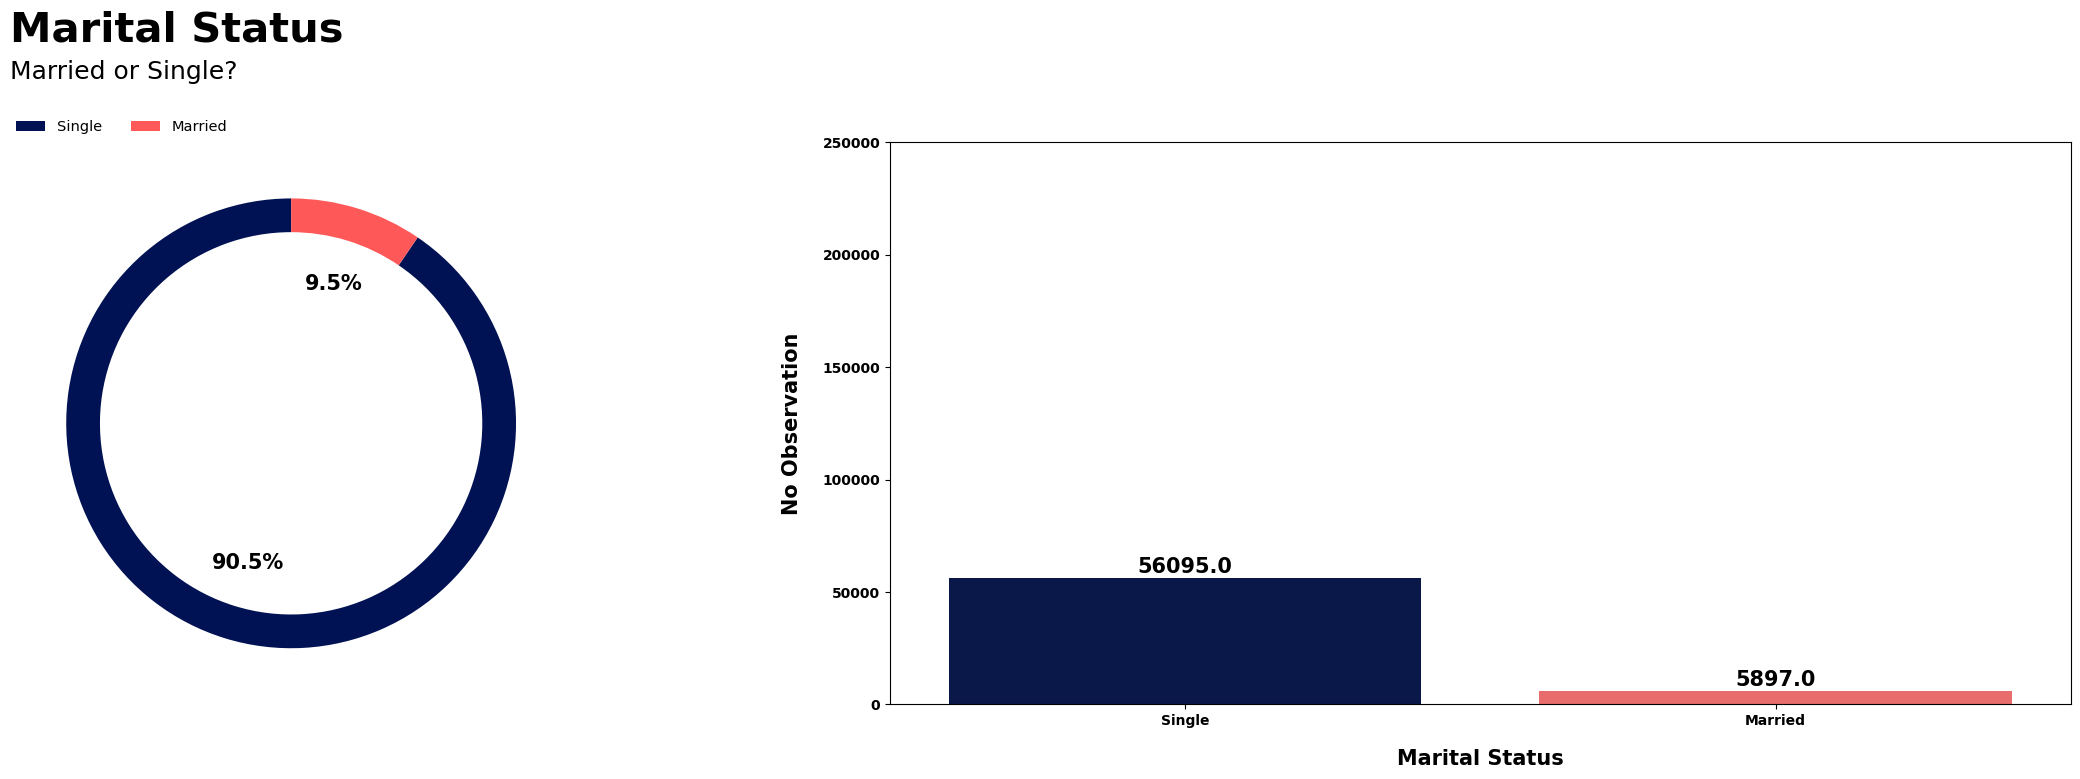

In [319]:
relation_stts = df["married_single"].value_counts()

count_pie_plot(
    datapie= relation_stts,
    datacount= df,
    colcount= "married_single",
    colpiey= relation_stts.values,
    text1= "Marital Status",
    pielabels= ["Single", "Married"],
    text2= "Married or Single?",
    piecomap= ["#001253", "#FF5858"],
    countcomap= ["#001253", "#FF5858"],
    xlabel= "Marital Status",
    piefs= 15,
    yplus= 5000,
    ylabel= "No Observation",
    xticklabel= ["Single", "Married"],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 250000,
);

C:\Users\User\AppData\Local\Temp\ipykernel_3160\537523277.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(


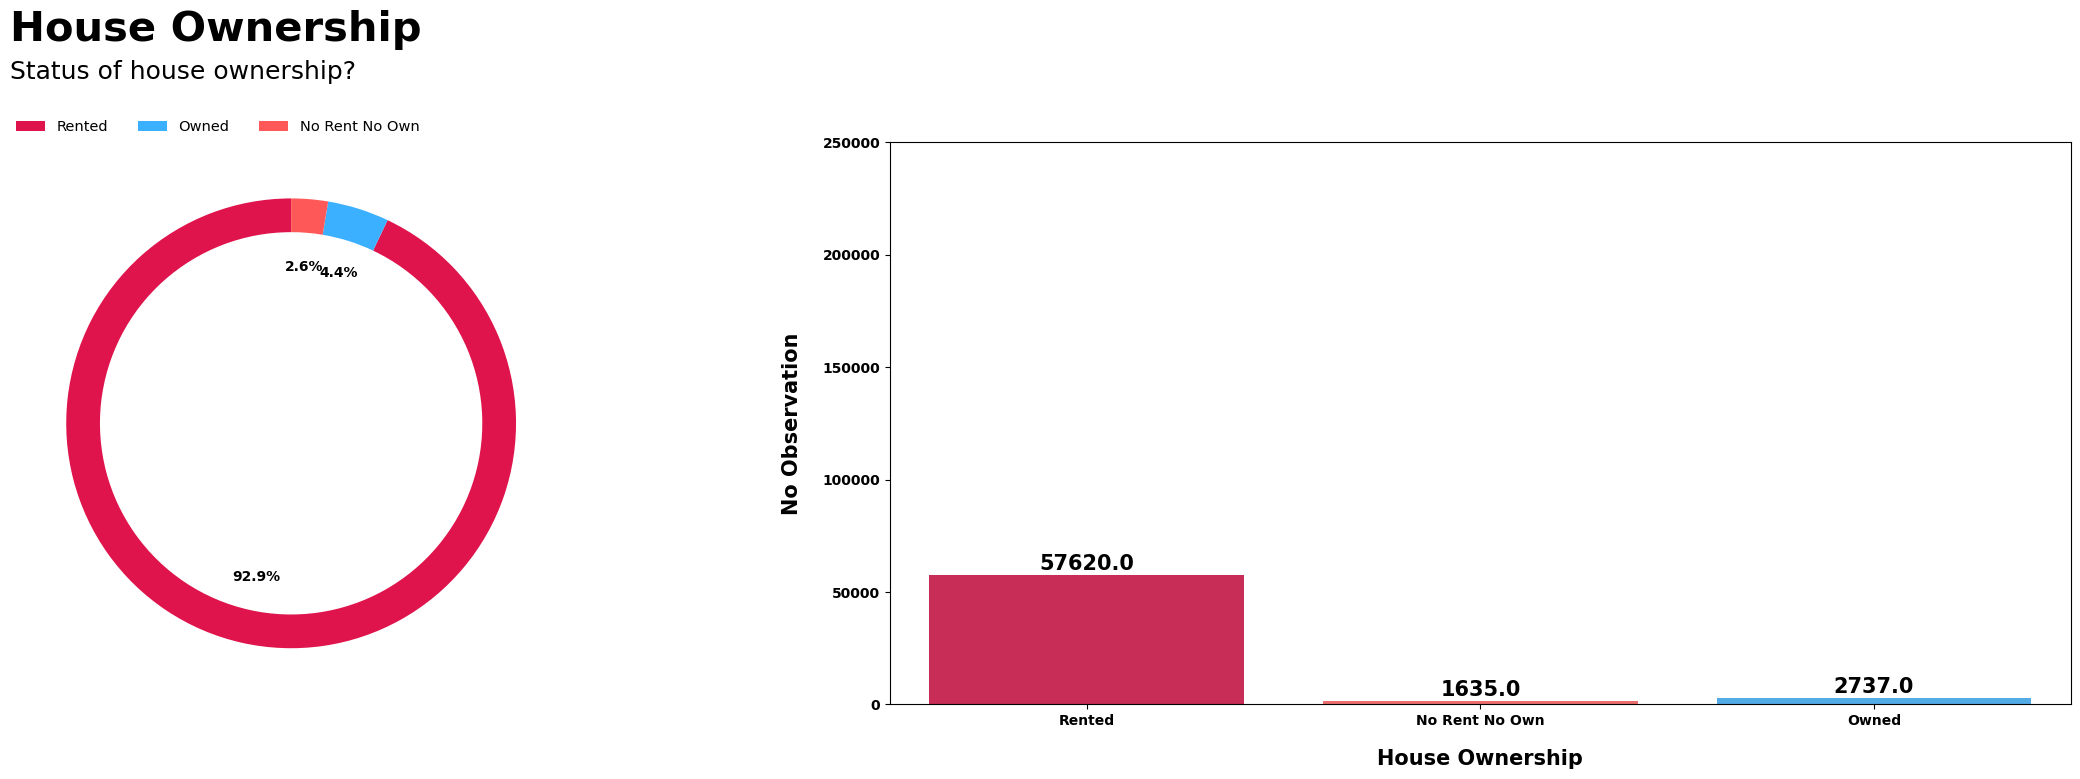

In [320]:
house_owner_stts = df["house_ownership"].value_counts()

count_pie_plot(
    datapie= house_owner_stts,
    datacount= df,
    colcount= "house_ownership",
    colpiey= house_owner_stts.values,
    text1= "House Ownership",
    pielabels= ["Rented", "Owned", "No Rent No Own"],
    text2= "Status of house ownership?",
    piecomap= ["#E0144C", "#3AB0FF", "#FF5858"],
    countcomap= ["#E0144C", "#FF5858", "#3AB0FF"],
    xlabel= "House Ownership",
    piefs= 10,
    yplus= 5000,
    pctdistance= 0.7,
    ylabel= "No Observation",
    xticklabel= ["Rented", "No Rent No Own", "Owned"],
    yticklabel= list(np.arange(0, 260000, 50000)),
    ystart= 0,
    yend= 250000
);

C:\Users\User\AppData\Local\Temp\ipykernel_3160\537523277.py:72: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(


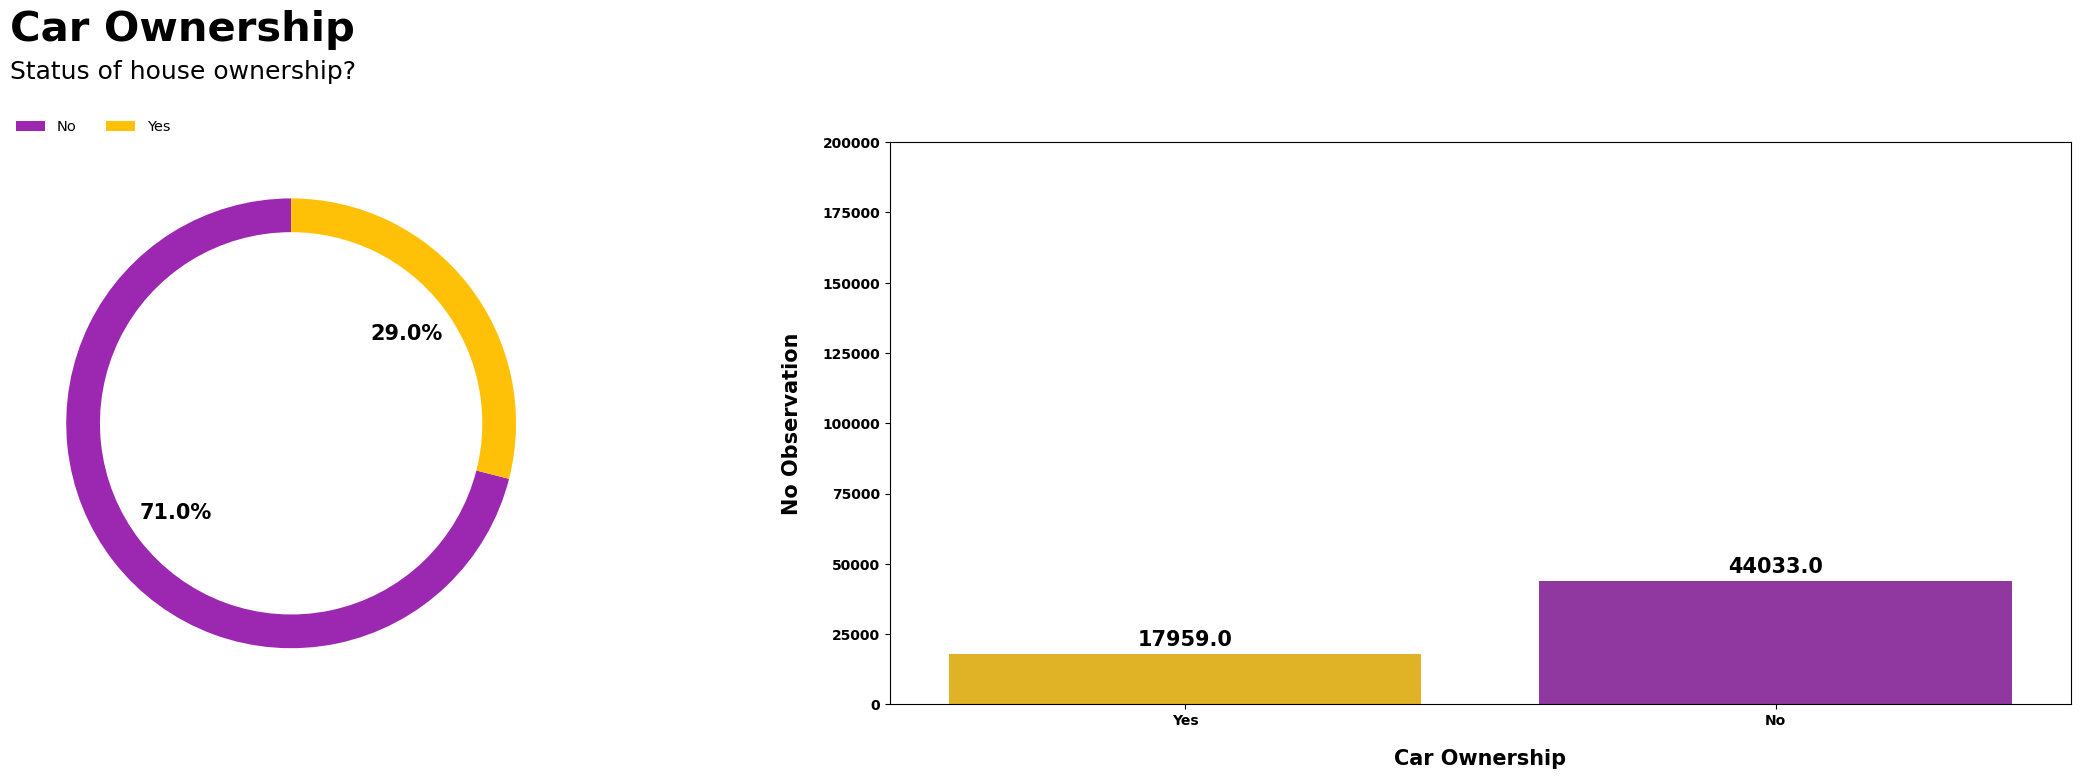

In [371]:
car_owner_stts = df["car_ownership"].value_counts()

count_pie_plot(
    datapie= car_owner_stts,
    datacount= df,
    colcount= "car_ownership",
    colpiey= car_owner_stts.values,
    text1= "Car Ownership",
    pielabels= ["No", "Yes"],
    text2= "Status of house ownership?",
    piecomap= ["#9C27B0", "#FFC107"],
    countcomap= ["#FFC107", "#9C27B0"],
    xlabel= "Car Ownership",
    piefs= 15,
    yplus= 5000,
    ylabel= "No Observation",
    xticklabel= ["Yes", "No"],
    yticklabel= list(np.arange(0, 225000, 25000)),
    ystart= 0,
    yend= 200000,
);

### Bivariate Analysis for each features with risk_flag

In [326]:
marital_status = df.groupby('married_single').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
marital_status['frequency'] = df['married_single'].value_counts()
marital_status

,risk_flag,frequency
married_single,,
single,50.557091,56095
married,44.700695,5897


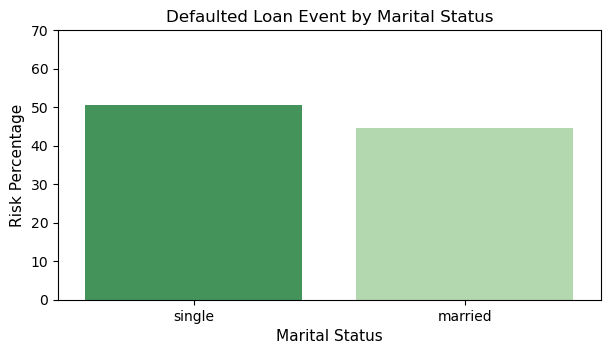

In [327]:
plt.figure(figsize=(7,3.5))
sns.barplot(data=marital_status, x=marital_status.index, y=marital_status.risk_flag, order=marital_status.index, palette='Greens_r')
plt.title('Defaulted Loan Event by Marital Status', fontsize=12)
plt.xlabel('Marital Status', fontsize=11)
plt.ylabel('Risk Percentage', fontsize=11)
plt.yticks(np.arange(0,80,10))
plt.show()

In [328]:
house_ownership = df.groupby('house_ownership').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
house_ownership['frequency'] = df['house_ownership'].value_counts()
house_ownership

,risk_flag,frequency
house_ownership,,
rented,50.539743,57620
norent_noown,43.730887,1635
owned,42.382170,2737


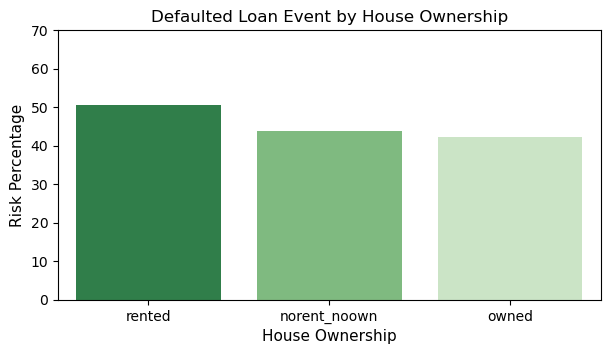

In [329]:
plt.figure(figsize=(7,3.5))
sns.barplot(data=house_ownership, x=house_ownership.index, y=house_ownership.risk_flag, order=house_ownership.index, palette='Greens_r')
plt.title('Defaulted Loan Event by House Ownership', fontsize=12)
plt.xlabel('House Ownership', fontsize=11)
plt.ylabel('Risk Percentage', fontsize=11)
plt.yticks(np.arange(0,80,10))
plt.show()

In [330]:
car_ownership = df.groupby('car_ownership').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
car_ownership['frequency'] = df['car_ownership'].value_counts()
car_ownership

,risk_flag,frequency
car_ownership,,
no,51.236573,44033
yes,46.968094,17959


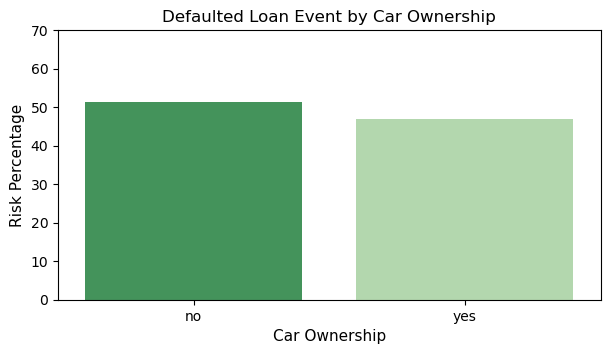

In [331]:
plt.figure(figsize=(7,3.5))
sns.barplot(data=car_ownership, x=car_ownership.index, y=car_ownership.risk_flag, order=car_ownership.index, palette='Greens_r')
plt.title('Defaulted Loan Event by Car Ownership', fontsize=12)
plt.xlabel('Car Ownership', fontsize=11)
plt.ylabel('Risk Percentage', fontsize=11)
plt.yticks(np.arange(0,80,10))
plt.show()

In [332]:
profession = df.groupby('profession').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
profession['frequency'] = df['profession'].value_counts()
profession

,risk_flag,frequency
profession,,
Chartered_Accountant,58.227848,1185
Police_officer,58.169014,1420
Software_Developer,57.781202,1298
Army_officer,56.136184,1263
Geologist,55.427632,1216
Surveyor,54.923077,1300
Hotel_Manager,54.808444,1279
Scientist,54.761905,1260
Firefighter,53.684211,1140


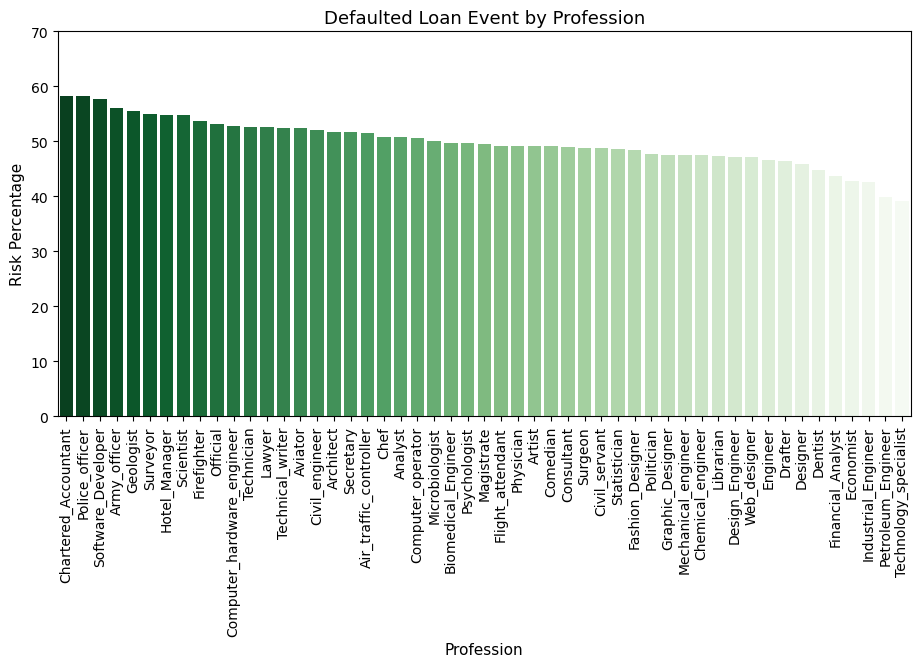

In [333]:
plt.figure(figsize=(11,5))
sns.barplot(data=profession, x=profession.index, y=profession.risk_flag, order=profession.index, palette='Greens_r')
plt.title('Defaulted Loan Event by Profession', fontsize=13)
plt.xlabel('Profession', fontsize=11)
plt.xticks(rotation=90)
plt.ylabel('Risk Percentage', fontsize=11)
plt.yticks(np.arange(0,80,10))
plt.show()

In [334]:
city = df.groupby('city').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
city['frequency'] = df['city'].value_counts()
city

,risk_flag,frequency
city,,
Bhubaneswar,81.818182,242
Bettiah,73.493976,166
Sikar,72.900763,262
Gwalior,70.000000,240
Kavali,69.548872,266
...,...,...
Rajpur,20.689655,145
Bijapur,20.408163,98
Bangalore,20.300752,133


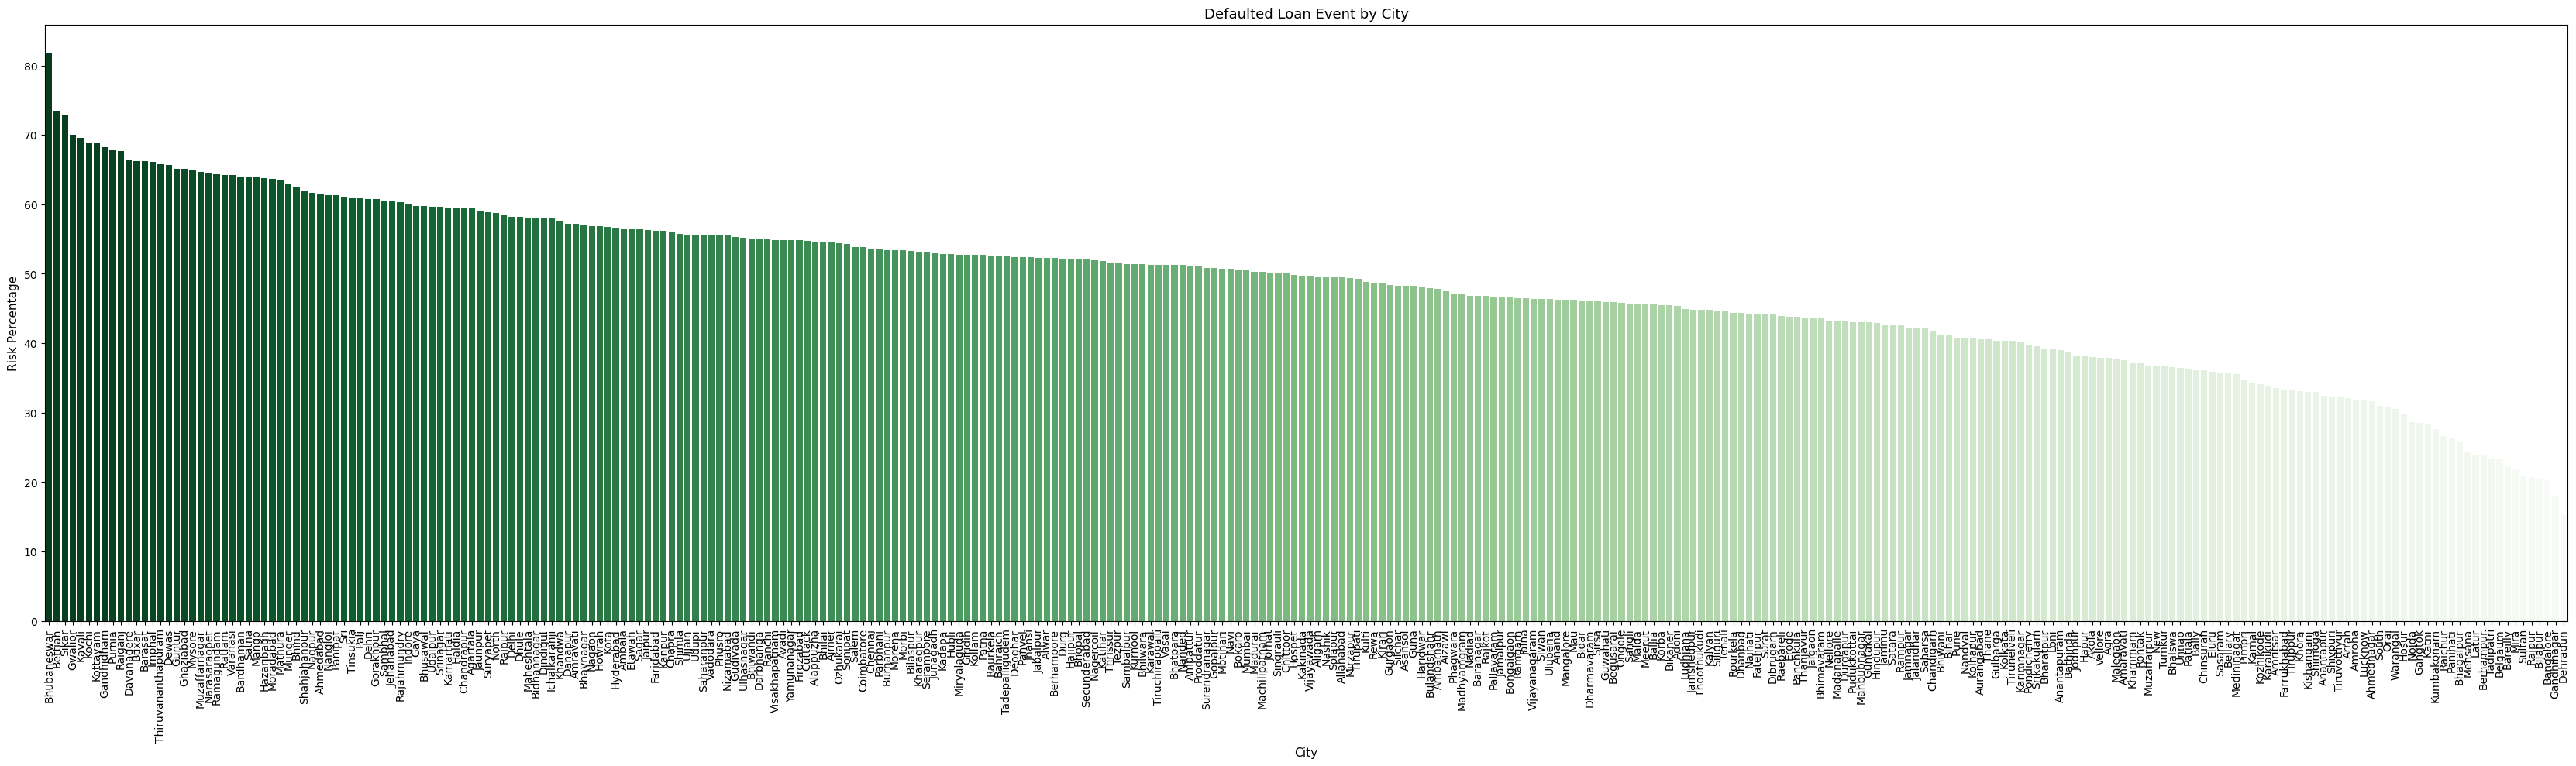

In [335]:
plt.figure(figsize=(42,10))
sns.barplot(data=city, x=city.index, y=city.risk_flag, order=city.index, palette='Greens_r')
plt.title('Defaulted Loan Event by City', fontsize=13)
plt.xlabel('City', fontsize=11)
plt.xticks(rotation=90)
plt.ylabel('Risk Percentage', fontsize=11)
plt.show()

In [336]:
state = df.groupby('state').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
state['frequency'] = df['state'].value_counts()
state

,risk_flag,frequency
state,,
Manipur,66.064982,277
Kerala,59.545734,1629
Tripura,59.388646,229
Himachal,55.778894,199
Madhya,55.598062,3921
Odisha,54.876033,1210
Rajasthan,54.537780,2369
Jammu,54.527938,519
Chhattisgarh,53.620147,953


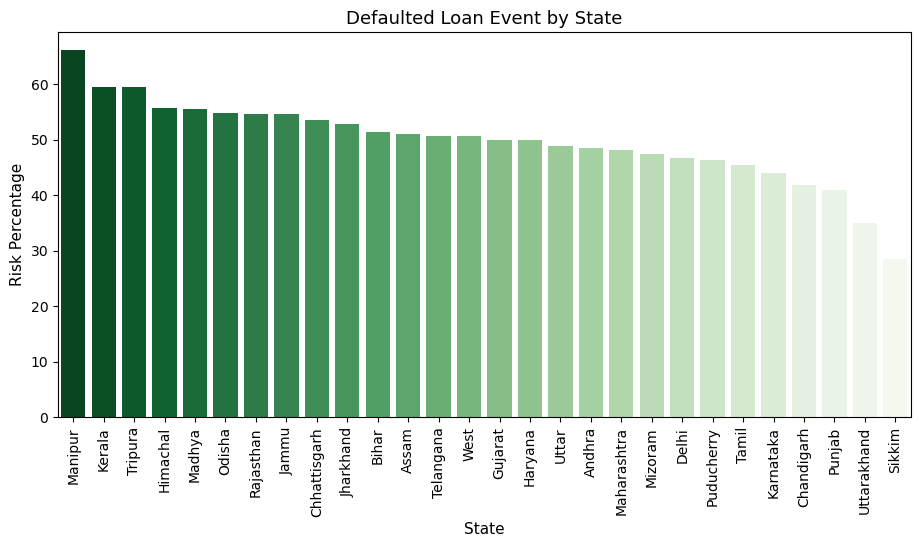

In [337]:
plt.figure(figsize=(11,5))
sns.barplot(data=state, x=state.index, y=state.risk_flag, order=state.index, palette='Greens_r')
plt.title('Defaulted Loan Event by State', fontsize=13)
plt.xlabel('State', fontsize=11)
plt.xticks(rotation=90)
plt.ylabel('Risk Percentage', fontsize=11)
plt.show()

In [338]:
# Define bins and labels for age categories
bins = [18, 30, 45, float('inf')]  # Bins for age ranges: 18-30, 31-45, above 45
labels = ['Young Adults (18-30)', 'Middle-Age Adults (31-45)', 'Old-Age Adults (>45)']

# Create a new column 'Age Category' based on the age bins
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels)

# Display the DataFrame
df.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,age_category
244447,244448,2440995,31,5,single,rented,yes,Biomedical_Engineer,Chinsurah,West,5,10,0,Middle-Age Adults (31-45)
25123,25124,8387345,79,19,single,rented,no,Hotel_Manager,Nanded,Maharashtra,14,13,0,Old-Age Adults (>45)
188546,188547,5088858,51,5,single,norent_noown,no,Flight_attendant,Bharatpur,Rajasthan,5,12,0,Old-Age Adults (>45)
18951,18952,601404,47,20,single,rented,no,Petroleum_Engineer,Navi,Maharashtra,8,10,1,Old-Age Adults (>45)
174934,174935,8215558,43,1,single,rented,yes,Surveyor,Dindigul,Tamil,1,13,1,Middle-Age Adults (31-45)


In [339]:
age = df.groupby('age_category').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
age['frequency'] = df['age_category'].value_counts()
age

,risk_flag,frequency
age_category,,
Young Adults (18-30),54.767684,11536
Old-Age Adults (>45),49.094933,35246
Middle-Age Adults (31-45),48.481262,15210


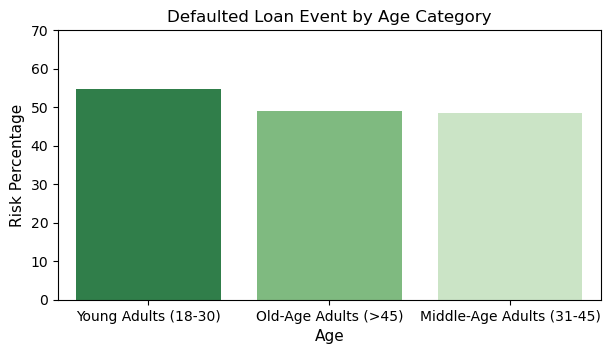

In [352]:
plt.figure(figsize=(7,3.5))
sns.barplot(data=age, x=age.index, y=age.risk_flag, order=age.index, palette='Greens_r')
plt.title('Defaulted Loan Event by Age Category', fontsize=12)
plt.xlabel('Age', fontsize=11)
plt.ylabel('Risk Percentage', fontsize=11)
plt.yticks(np.arange(0,80,10))
plt.show()

In [341]:
df['income'] = df['income'] * 0.01207

# Define quantiles
_25_quantile = np.quantile(df.income, 0.25)
_75_quantile = np.quantile(df.income, 0.75)

# Define bins and labels for income categories
bins = [-np.inf, _25_quantile, _75_quantile, np.inf]  # Bins for income ranges
labels = ['Lower', 'Middle', 'Upper']

# Create a new column 'Age Category' based on the age bins
df['income_category'] = pd.cut(df['income'], bins=bins, labels=labels)

# Display the DataFrame
df.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag,age_category,income_category
244447,244448,29462.80965,31,5,single,rented,yes,Biomedical_Engineer,Chinsurah,West,5,10,0,Middle-Age Adults (31-45),Lower
25123,25124,101235.25415,79,19,single,rented,no,Hotel_Manager,Nanded,Maharashtra,14,13,0,Old-Age Adults (>45),Upper
188546,188547,61422.51606,51,5,single,norent_noown,no,Flight_attendant,Bharatpur,Rajasthan,5,12,0,Old-Age Adults (>45),Middle
18951,18952,7258.94628,47,20,single,rented,no,Petroleum_Engineer,Navi,Maharashtra,8,10,1,Old-Age Adults (>45),Lower
174934,174935,99161.78506,43,1,single,rented,yes,Surveyor,Dindigul,Tamil,1,13,1,Middle-Age Adults (31-45),Upper


In [342]:
income = df.groupby('income_category').risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending= False).to_frame()
income['frequency'] = df['income_category'].value_counts()
income

,risk_flag,frequency
income_category,,
Lower,51.006452,15500
Upper,50.972411,15477
Middle,49.011768,31015


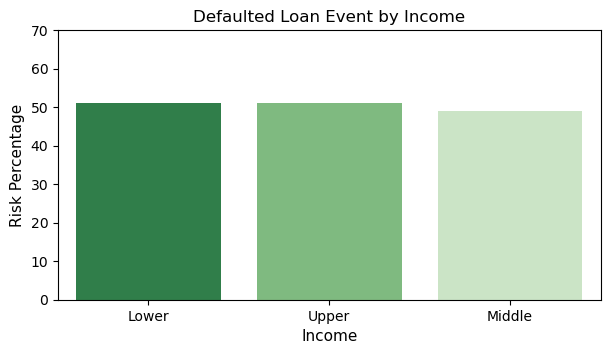

In [343]:
plt.figure(figsize=(7,3.5))
sns.barplot(data=income, x=income.index, y=income.risk_flag, order=income.index, palette='Greens_r')
plt.title('Defaulted Loan Event by Income', fontsize=12)
plt.xlabel('Income', fontsize=11)
plt.ylabel('Risk Percentage', fontsize=11)
plt.yticks(np.arange(0,80,10))
plt.show()

In [344]:
young = df[df['age_category'] == 'Young Adults (18-30)']
mid = df[df['age_category'] == 'Middle-Age Adults (31-45)']
old = df[df['age_category'] == 'Old-Age Adults (>45)']

## Step 3: Hypothesis Testing

### Two-sample test (A/B Testing)

### 1. Prove (or disprove) that if income has effect on defaulted loan event?

**Step 1: Formulate your null and alternative hypotheses here:**

*   $H_0$:μ1=μ2 There is no difference in the defaulted loan event rate between upper income and lower income individuals.
*   $H_A$:μ1≠μ2 There is a difference in the defaulted loan event rate between upper income and lower income individuals.

**Step 2: Decide the significance level:**

* α = 0.05

**Step 3: Compute the test-statistics and p-value:**

In [345]:
lower_income = df[df['income_category'] == 'Lower']
upper_income = df[df['income_category'] == 'Upper']

# Count the number of high-risk customers (risk_flag = 1) in each group
lower_income_risk_count = lower_income['risk_flag'].sum()
upper_income_risk_count = upper_income['risk_flag'].sum()

# Count the total number of customers in each group
lower_income_total_count = len(lower_income)
upper_income_total_count = len(upper_income)

# Create a 2x2 contingency table
observed = np.array([[lower_income_risk_count, lower_income_total_count - lower_income_risk_count],
                     [upper_income_risk_count, upper_income_total_count - upper_income_risk_count]])

# Perform chi-squared test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Output chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

Chi-squared statistic: 0.0023579819099253303
P-value: 0.9612707001058938


**Step 4: Draw a conclusion:**

* Since the p-value > significance level: Fail to reject the H0 and conclude that there is no statistically significant difference in the defaulted loan event

### 2. Prove (or disprove) that age has an effect on the defaulted loan event?

**Step 1: Formulate your null and alternative hypotheses here:**

*   $H_0$:μ1=μ2 There is no difference in the mean age of defaulted loan event rate individuals.
*   $H_A$:μ1≠μ2 There is a difference in the mean age of defaulted loan event rate individuals.

**Step 2: Decide the significance level:**

* α = 0.05

**Step 3: Compute the test-statistics and p-value:**

In [346]:
low_risk = df[df['risk_flag'] == 0]
high_risk = df[df['risk_flag'] == 1]

tstat, pvalue = stats.ttest_ind(a=low_risk['age'], b=high_risk['age'], equal_var=False)
print(tstat)
print(pvalue)

8.09193438325954
5.977980466571768e-16


**Step 4: Draw a conclusion:**

* Since the p-value < significance level: Reject the H0 and conclude that there is a difference in mean age of defaulted loan event rate individuals

### 3. Prove (or disprove) that years of working eperience has an effect on the defaulted loan event?

**Step 1: Formulate your null and alternative hypotheses here:**

*   $H_0$:μ1=μ2 There is no difference in the years of working experience of defaulted loan event rate individuals.
*   $H_A$:μ1≠μ2 There is a difference in the years of working experience of defaulted loan event rate individuals.

**Step 2: Decide the significance level:**

* α = 0.05

**Step 3: Compute the test-statistics and p-value:**

In [347]:
low_risk = df[df['risk_flag'] == 0]
high_risk = df[df['risk_flag'] == 1]

tstat, pvalue = stats.ttest_ind(a=low_risk['experience'], b=high_risk['experience'], equal_var=False)
print(tstat)
print(pvalue)

13.5545941076016
8.537999483501699e-42


**Step 4: Draw a conclusion:**

* Since the p-value < significance level: Reject the H0 and conclude that there is a difference in years of working experience of defaulted loan event rate individuals

### 4. Prove (or disprove) that age has an effect on the defaulted loan event?

**Step 1: Formulate your null and alternative hypotheses here:**

*   $H_0$:μ1=μ2 There is no difference in the mean age of defaulted loan event rate individuals.
*   $H_A$:μ1≠μ2 There is a difference in the mean age of defaulted loan event rate individuals.

**Step 2: Decide the significance level:**

* α = 0.05

**Step 3: Compute the test-statistics and p-value:**

In [348]:
low_risk = df[df['risk_flag'] == 0]
high_risk = df[df['risk_flag'] == 1]

tstat, pvalue = stats.ttest_ind(a=low_risk['age'], b=high_risk['age'], equal_var=False)
print(tstat)
print(pvalue)

8.09193438325954
5.977980466571768e-16


**Step 4: Draw a conclusion:**

* Since the p-value < significance level: Reject the H0 and conclude that there is a difference in mean age of defaulted loan event rate individuals

### 5. Prove (or disprove) that the defaulted loan event made by the people who married is greater than those who are single?

**Step 1: Formulate your null and alternative hypotheses here:**

*   $H_0$:μ1=μ2 There is no difference in the defaulted loan event rate between married and single individuals.
*   $H_A$:μ1≠μ2 There is a difference in the defaulted loan event rate between married and single individuals.

**Step 2: Decide the significance level:**

* α = 0.05

**Step 3: Compute the test-statistics and p-value:**

In [349]:
married = df[df['married_single'] == 'married']
single = df[df['married_single'] == 'single']

# Count the number of high-risk customers (risk_flag = 1) in each group
married_risk_count = married['risk_flag'].sum()
single_risk_count = single['risk_flag'].sum()

# Count the total number of customers in each group
married_total_count = len(married)
single_total_count = len(single)

# Create a 2x2 contingency table
observed = np.array([[married_risk_count, married_total_count - married_risk_count],
                     [single_risk_count, single_total_count - single_risk_count]])

# Perform chi-squared test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Output chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

Chi-squared statistic: 72.97087385203427
P-value: 1.3157732971339816e-17


**Step 4: Draw a conclusion:**

* Since the p-value < significance level: Reject the H0 and conclude that there is a statistically significant association between marital status and high-risk customers

### 6. Prove (or disprove) that the defaulted loan event made by the people who owned a house is greater than those who don't?

**Step 1: Formulate your null and alternative hypotheses here:**

*   $H_0$:μ1=μ2 There is no difference in the defaulted loan event rate between house owners and non house owners.
*   $H_A$:μ1≠μ2 There is a difference in the defaulted loan event rate between house owners and non house owners.

**Step 2: Decide the significance level:**

* α = 0.05

**Step 3: Compute the test-statistics and p-value:**

In [350]:
house_rented = df[df['house_ownership'] == 'rented']
house_owned = df[df['house_ownership'] == 'owned']

# Count the number of high-risk customers (risk_flag = 1) in each group
rented_risk_count = house_rented['risk_flag'].sum()
owned_risk_count = house_owned['risk_flag'].sum()

# Count the total number of customers in each group
rented_total_count = len(house_rented)
owned_total_count = len(house_owned)

# Create a 2x2 contingency table
observed = np.array([[rented_risk_count, rented_total_count - rented_risk_count],
                     [owned_risk_count, owned_total_count - owned_risk_count]])

# Perform chi-squared test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Output chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

Chi-squared statistic: 69.22570930559789
P-value: 8.781584173740734e-17


**Step 4: Draw a conclusion:**

* Since the p-value < significance level: Reject the H0 and conclude that there is a statistically significant difference in the defaulted loan event

### 7. Prove (or disprove) that the defaulted loan event made by the people who owned a car is greater than those who don't?

**Step 1: Formulate your null and alternative hypotheses here:**

*   $H_0$:μ1=μ2 There is no difference in the defaulted loan event rate between car owners and non car owners.
*   $H_A$:μ1≠μ2 There is a difference in the defaulted loan event rate between car owners and non car owners.

**Step 2: Decide the significance level:**

* α = 0.05

**Step 3: Compute the test-statistics and p-value:**

In [351]:
non_car_owner = df[df['car_ownership'] == 'no']
car_owner = df[df['car_ownership'] == 'yes']

# Count the number of high-risk customers (risk_flag = 1) in each group
non_car_owner_risk_count = non_car_owner['risk_flag'].sum()
car_owner_risk_count = car_owner['risk_flag'].sum()

# Count the total number of customers in each group
non_car_owner_total_count = len(non_car_owner)
car_owner_total_count = len(car_owner)

# Create a 2x2 contingency table
observed = np.array([[non_car_owner_risk_count, non_car_owner_total_count - non_car_owner_risk_count],
                     [car_owner_risk_count, car_owner_total_count - car_owner_risk_count]])

# Perform chi-squared test for independence
chi2_stat, p_val, dof, expected = chi2_contingency(observed)

# Output chi-squared statistic and p-value
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)

Chi-squared statistic: 92.79680269360266
P-value: 5.794869681055212e-22


**Step 4: Draw a conclusion:**

* Since the p-value < significance level: Reject the H0 and conclude that there is a statistically significant difference in the defaulted loan event

### Seems like hypothesis testing doesn't provide any useful information in reducing features used for model building

## Step 4: Feature Selection

### Leverage Random Forest Model for feature importance scores

In [135]:
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single',
       'house_ownership', 'car_ownership', 'profession', 'city', 'state',
       'current_job_yrs', 'current_house_yrs', 'risk_flag', 'age_category',
       'income_category'],
      dtype='object')

In [372]:
decision_tree_df = df.drop(columns={'id','city','state','profession','age_category','income_category'})
decision_tree_df = pd.get_dummies(decision_tree_df, drop_first=True, dtype='int')
decision_tree_df.head()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag,married_single_single,house_ownership_owned,house_ownership_rented,car_ownership_yes
244447,29462.80965,31,5,5,10,0,1,0,1,1
25123,101235.25415,79,19,14,13,0,1,0,1,0
188546,61422.51606,51,5,5,12,0,1,0,0,0
18951,7258.94628,47,20,8,10,1,1,0,1,0
174934,99161.78506,43,1,1,13,1,1,0,1,1


In [180]:
y_rf = decision_tree_df['risk_flag']

X_rf = decision_tree_df.drop('risk_flag', axis=1)
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.25, stratify=y_rf, random_state=42)

In [181]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model to training data
decision_tree.fit(X_rf_train, y_rf_train)

# Make prediction on test data
y_rf_pred = decision_tree.predict(X_rf_test)

In [182]:
# Generate performance metrics
print('accuracy score:', accuracy_score(y_rf_test, y_rf_pred))

# Print your precision score.
print('precision score:', precision_score(y_rf_test, y_rf_pred))

# Print your recall score.
print('recall score:', recall_score(y_rf_test, y_rf_pred))

# Print your f1 score.
print('f1 score:', f1_score(y_rf_test, y_rf_pred))

accuracy score: 0.8663053297199639
precision score: 0.8528278433809819
recall score: 0.8854045683313976
f1 score: 0.868810940863619


In [274]:
# Generate performance metrics
dt_score = round(accuracy_score(y_rf_test, y_rf_pred),3)
dt_precision = round(precision_score(y_rf_test, y_rf_pred),3)
dt_recall = round(recall_score(y_rf_test, y_rf_pred),3)
dt_f1 = round(f1_score(y_rf_test, y_rf_pred),3)
_dt = ['Decision Tree', dt_score, dt_precision, dt_recall, dt_f1]

Standalone_dt = pd.DataFrame([_dt])
Standalone_dt.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
Standalone_dt

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.866,0.853,0.885,0.869


In [183]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts model, X data (test or validate), and y data (test or validate).
    Returns a plot of confusion matrix for predictions on the y data
    '''
    
    model_y_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    
    disp.plot()
    plt.show()

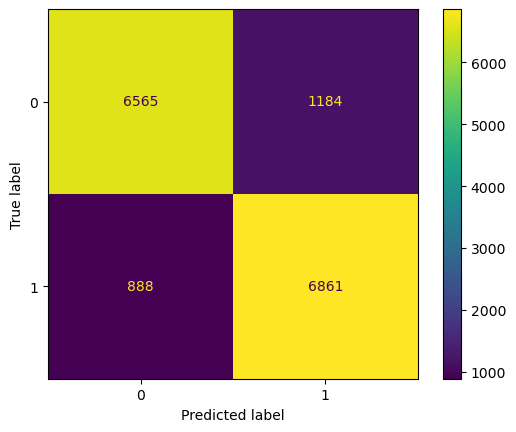

In [184]:
conf_matrix_plot(decision_tree, X_rf_test, y_rf_test)

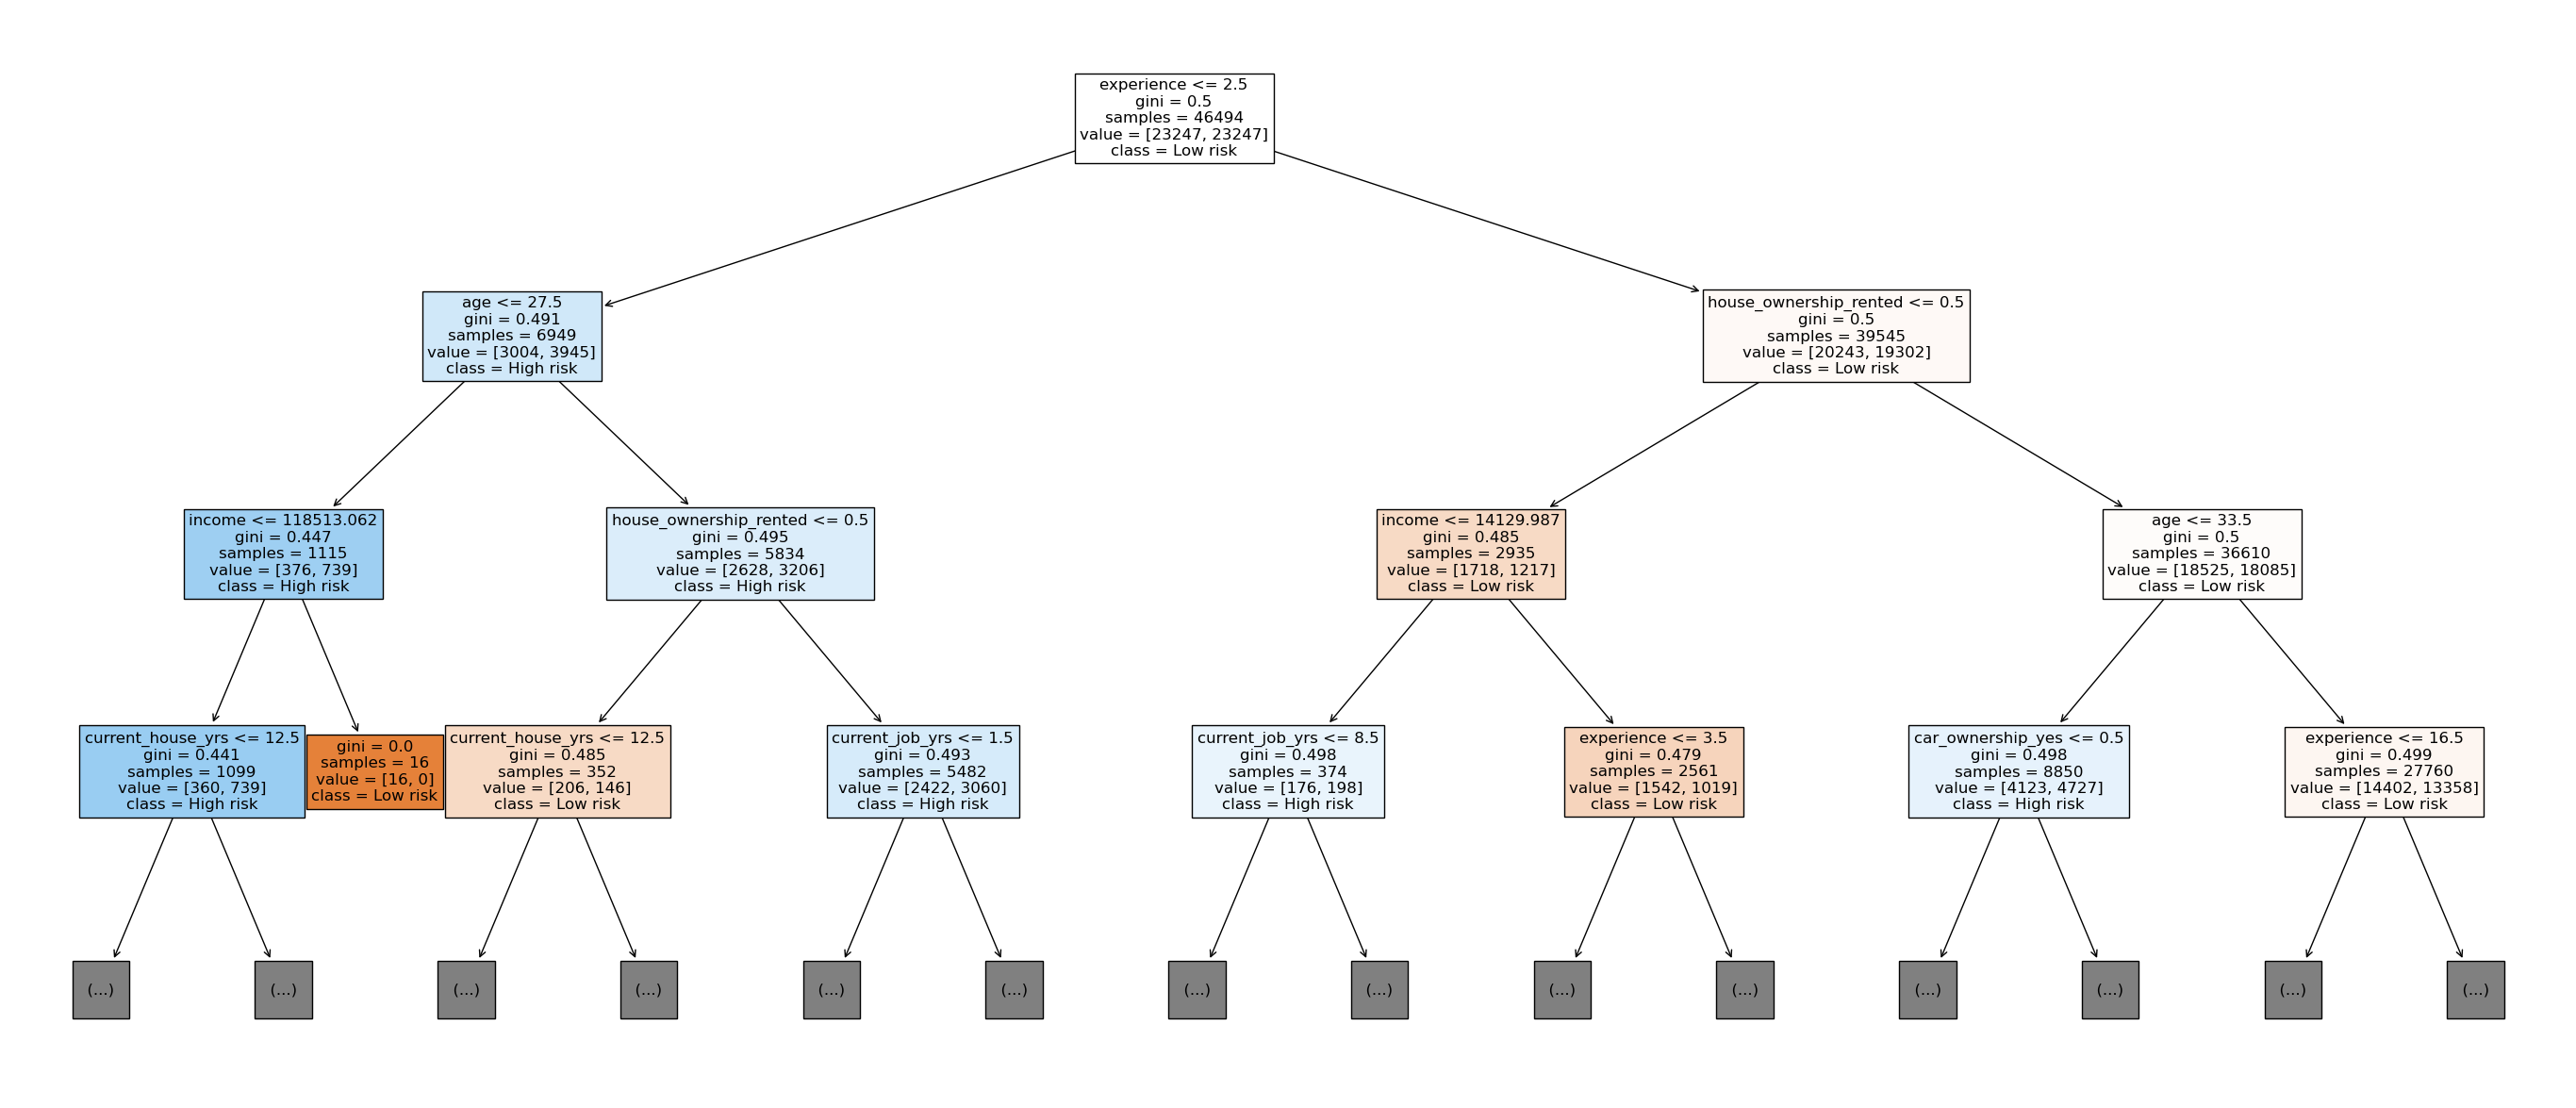

In [148]:
# Plot the tree to determine top 5 strong predictors
plt.figure(figsize=(35,15))
plot_tree(decision_tree, max_depth=3, fontsize=12, feature_names=X_rf.columns,
          class_names={0: 'Low risk', 1: 'High risk'}, filled=True)
plt.show()

### Summary:
#### Top 4 predictors ('income', 'age', 'experience', 'house_ownership') identified by the Decision Tree Model are used to build Naive Bayes Classifier

## Step 5: Data Modelling

### Naive Bayes

In [293]:
X = df.drop(columns=['id','married_single','car_ownership','profession','city','state',
                     'current_job_yrs', 'current_house_yrs','risk_flag','age_category','income_category'])
X_end = pd.get_dummies(X, drop_first=True,dtype='int')
y = df['risk_flag']

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X_end, y, test_size=0.25, random_state=0)

In [227]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [228]:
clf = naive_bayes.MultinomialNB()
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [233]:
# Generate performance metrics
M_nb_score = round(accuracy_score(y_test, y_pred),3)
M_nb_precision = round(precision_score(y_test, y_pred),3)
M_nb_recall = round(recall_score(y_test, y_pred),3)
M_nb_f1 = round(f1_score(y_test, y_pred),3)
_M_nb = ['Multinomial Naive Bayes', M_nb_score, M_nb_precision, M_nb_recall, M_nb_f1]

Standalone_NB = pd.DataFrame([_M_nb])
Standalone_NB.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
Standalone_NB

,Model,Accuracy,Precision,Recall,F1
0,Multinomial Naive Bayes,0.519,0.511,0.879,0.647


In [229]:
# Generate performance metrics
print('accuracy score:', accuracy_score(y_test, y_pred))

# Print your precision score.
print('precision score:', precision_score(y_test, y_pred))

# Print your recall score.
print('recall score:', recall_score(y_test, y_pred))

# Print your f1 score.
print('f1 score:', f1_score(y_test, y_pred))

accuracy score: 0.5194863853400439
precision score: 0.5112612612612613
recall score: 0.8790499548212212
f1 score: 0.64650875777282


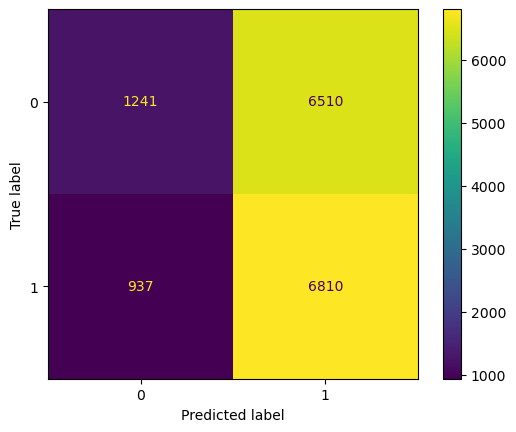

In [172]:
# Confusion Matrix
cm = metrics.confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [173]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.16      0.57      0.25      2178
           1       0.88      0.51      0.65     13320

    accuracy                           0.52     15498
   macro avg       0.52      0.54      0.45     15498
weighted avg       0.78      0.52      0.59     15498



## Step 6: Model Improvement

In [237]:
# Initialize base Naive Bayes classifier
base_nb = naive_bayes.MultinomialNB()

# Initialize ensemble classifiers
bagging_nb = BaggingClassifier(base_estimator=base_nb, n_estimators=10)
boosting_nb = AdaBoostClassifier(base_estimator=base_nb, n_estimators=10)
voting_nb = VotingClassifier(estimators=[('nb', base_nb), ('bagging_nb', bagging_nb), ('boosting_nb', boosting_nb)], voting='hard')

# Train ensemble classifiers
bagging_nb.fit(X_train_scaled, y_train)
boosting_nb.fit(X_train_scaled, y_train)
voting_nb.fit(X_train_scaled, y_train)

# Calculate accuracy, precision, recall, and F1-score for bagging classifier
bagging_nb_score = round(bagging_nb.score(X_test_scaled, y_test),3)
bagging_nb_precision = round(precision_score(y_test, bagging_nb.predict(X_test_scaled)),3)
bagging_nb_recall = round(recall_score(y_test, bagging_nb.predict(X_test_scaled)),3)
bagging_nb_f1 = round(f1_score(y_test, bagging_nb.predict(X_test_scaled)),3)
_bagging_nb = ['Bagging Naive Bayes', bagging_nb_score, bagging_nb_precision, bagging_nb_recall, bagging_nb_f1]

# Calculate accuracy, precision, recall, and F1-score for boosting classifier
boosting_nb_score = round(boosting_nb.score(X_test_scaled, y_test),3)
boosting_nb_precision = round(precision_score(y_test, boosting_nb.predict(X_test_scaled)),3)
boosting_nb_recall = round(recall_score(y_test, boosting_nb.predict(X_test_scaled)),3)
boosting_nb_f1 = round(f1_score(y_test, boosting_nb.predict(X_test_scaled)),3)
_boosting_nb = ['Boosting Naive Bayes', boosting_nb_score, boosting_nb_precision, boosting_nb_recall, boosting_nb_f1]

# Calculate accuracy, precision, recall, and F1-score for voting classifier
voting_nb_score = round(voting_nb.score(X_test_scaled, y_test),3)
voting_nb_precision = round(precision_score(y_test, voting_nb.predict(X_test_scaled)),3)
voting_nb_recall = round(recall_score(y_test, voting_nb.predict(X_test_scaled)),3)
voting_nb_f1 = round(f1_score(y_test, voting_nb.predict(X_test_scaled)),3)
_voting_nb = ['Voting Naive Bayes', voting_nb_score, voting_nb_precision, voting_nb_recall, voting_nb_f1]

Ensemble_Metrics = pd.DataFrame([_bagging_nb,_boosting_nb,_voting_nb])
Ensemble_Metrics.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1']
Ensemble_Metrics

C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1
0,Bagging Naive Bayes,0.522,0.513,0.846,0.639
1,Boosting Naive Bayes,0.525,0.520,0.661,0.582
2,Voting Naive Bayes,0.519,0.511,0.879,0.647


In [291]:
Model_Metrics = pd.concat([Standalone_dt,Standalone_NB,Ensemble_Metrics], axis=0).reset_index(drop=True)
Model_Metrics

,Model,Accuracy,Precision,Recall,F1
0,Decision Tree,0.866,0.853,0.885,0.869
1,Multinomial Naive Bayes,0.519,0.511,0.879,0.647
2,Bagging Naive Bayes,0.522,0.513,0.846,0.639
3,Boosting Naive Bayes,0.525,0.520,0.661,0.582
4,Voting Naive Bayes,0.519,0.511,0.879,0.647


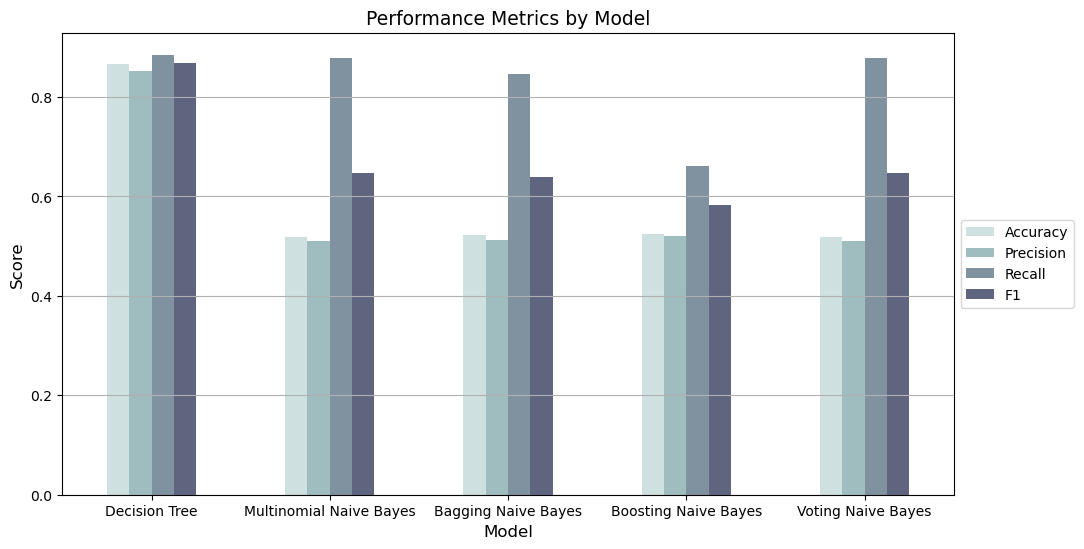

In [292]:
# Set the 'Model' column as the index for easy plotting
Model_Metrics.set_index('Model', inplace=True)

colors = sns.color_palette('bone_r')

# Plot the bar chart
Model_Metrics.plot(kind='bar', figsize=(11.5, 6), color=colors)

# Add title and labels
plt.title('Performance Metrics by Model', fontsize=13.5)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0)
plt.ylabel('Score', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y')
plt.show()

## Conclusions

* This situation poses challenges from a real-world business perspective for banks. While Decision Trees exhibit high recall and precision, Naive Bayes offers high recall with lower precision. Banks need to carefully consider these trade-offs based on their specific business objectives and risk tolerance levels.

* Given the bank's requirement for a model with low susceptibility to overfitting and fast speed, while also prioritizing precision to avoid misclassification of low-risk customers as high-risk, a hybrid approach combining Decision Tree and Naive Bayes models could be beneficial. Here’s the suggested approach:

**1. Ensemble Learning with Weighted Voting:** Train both Decision Tree and Naive Bayes classifiers on the dataset. Assign weights to the models based on their individual precision scores. For example, if Decision Tree has higher precision than Naive Bayes, assign a higher weight to the Decision Tree model in the ensemble. Use a weighted voting scheme to make predictions, where the weight of each model corresponds to its precision performanc.

**2. Threshold Adjustment:** Adjust the classification threshold based on the precision-recall trade-off. By default, classifiers like Naive Bayes tend to have lower precision but higher recall. Increasing the threshold can lead to higher precision but lower recall, effectively reducing the number of false positives (low-risk customers misclassified as high-risk). This approach allows the leverage of both the speed and simplicity of Naive Bayes while still achieving the desired level of precision.

**3. Regularization Techniques:** Apply regularization techniques to the Decision Tree model to mitigate overfitting. Regularization methods such as pruning or limiting the maximum depth of the tree can help prevent the model from fitting noise in the data and generalize better to unseen samples. This ensures that the Decision Tree model maintains its performance while reducing the risk of overfitting.

## Key Takeaways

#### 1. Discrepancy in Decision Tree and Naive Bayes classification performance:
#### Decision Tree:

* The decision tree may have identified a set of features that effectively discriminate between different risk levels for bank loans.
* The high true positive and true negative rates indicate that the decision tree is adept at correctly classifying both high-risk and low-risk individuals.

#### Naive Bayes:
* The Naive Bayes model, despite using the **top 4 predictors ('income', 'age', 'experience', 'house_ownership')** identified by the decision tree, may struggle to capture the complex dependencies between features.
* As a result, while the Naive Bayes model achieves high true positive rates (similar to the decision tree), it also exhibits a higher false positive rate.
* The higher false positive rate suggests that the Naive Bayes model may be incorrectly classifying some low-risk individuals as high-risk, potentially due to the oversimplified assumption of feature independence.

#### 2. Improving Naive Bayes performance through ensemble techniques:
* $Bagging$: Combining models trained on different data subsets to reduce variance and overfitting.
* $Boosting$: Sequentially training models to correct errors made by previous ones, enhancing overall performance.
* $Stacking$: Combining predictions from  multiple heterogeneous models to leverage their individual strengths for better accuracy.

#### 3. Consistency of Naive Bayes and limited impact of bagging randomization:
* $Model Stability$: Naive Bayes classifiers exhibit stable predictions due to their reliance on class probabilities and assumption of feature independence.
* $Bagging Effect$: Since Naive Bayes relies heavily on class probabilities, randomization introduced by bagging may not significantly alter the final predictions, resulting in marginal improvements or even no improvement in performance.